In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline


In [139]:
df = pd.read_csv('Cab_Data.csv')

In [38]:
df.head(1000)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
...,...,...,...,...,...,...,...
995,10001305,42380,Yellow Cab,WASHINGTON DC,33.48,658.10,482.112
996,10001306,42380,Yellow Cab,WASHINGTON DC,39.00,774.12,496.080
997,10001307,42375,Yellow Cab,WASHINGTON DC,29.97,571.78,431.568
998,10001308,42372,Yellow Cab,WASHINGTON DC,31.03,723.56,390.978


In [20]:
df.shape

(359392, 7)

# Steps

1. Dealing the missing values.
2. Exploring about the numerical variables.
3. Exploring about the categorical variables.
4. Finding the realationship between features.

In [141]:
df3.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
New Date              0
dtype: int64

In [16]:
df_trans = pd.read_csv('Transaction_ID.csv') 
df_Cust = pd.read_csv('Customer_ID.csv')

In [13]:
df2 = pd.merge(df,df_trans, on = 'Transaction ID',how = 'left')

In [15]:
df2.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card


In [202]:
df3 = pd.merge(df2,df_Cust, on = 'Customer ID', how = 'left')

In [18]:
df3.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237


In [47]:
df3.shape

(359392, 12)

In [43]:
#No missing values found

df3.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [55]:
city_name_pink = df3.where(df3.Company == 'Pink Cab').City.value_counts().index
city_values_pink = df3.where(df3.Company == 'Pink Cab').City.value_counts().values

In [83]:
city_name_pink[:10]

Index(['LOS ANGELES CA', 'NEW YORK NY', 'SAN DIEGO CA', 'CHICAGO IL',
       'BOSTON MA', 'SILICON VALLEY', 'WASHINGTON DC', 'SEATTLE WA',
       'MIAMI FL', 'AUSTIN TX'],
      dtype='object')

In [84]:
city_name_yellow[:10]

Index(['NEW YORK NY', 'CHICAGO IL', 'WASHINGTON DC', 'LOS ANGELES CA',
       'BOSTON MA', 'SAN DIEGO CA', 'ATLANTA GA', 'DALLAS TX', 'SEATTLE WA',
       'SILICON VALLEY'],
      dtype='object')

In [94]:
labelp = ['LOS ANGELES CA', 'NEW YORK NY', 'SAN DIEGO CA', 'CHICAGO IL',
       'BOSTON MA', 'SILICON VALLEY', 'WASHINGTON DC', 'SEATTLE WA',
       'MIAMI FL', 'AUSTIN TX']
labely = ['NEW YORK NY', 'CHICAGO IL', 'WASHINGTON DC', 'LOS ANGELES CA',
       'BOSTON MA', 'SAN DIEGO CA', 'ATLANTA GA', 'DALLAS TX', 'SEATTLE WA',
       'SILICON VALLEY']

colorp = ['red','green','blue','orange','yellow',
        'brown','aliceblue','violet',
        'grey','pink']
colory = ['green','orange','aliceblue','red','yellow',
        'cyan','darkviolet','#00C957',
        'violet','brown']


In [70]:
df3.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [112]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labelp, values=city_values_pink[:10], name="Pink Cab"),
              1, 1)
fig.add_trace(go.Pie(labels=labely, values=city_values_yellow[:10], name="Yellow Cab"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.2, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="US City Cab Data",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pink', x=0.204, y=0.5, font_size=14, showarrow=False),
                 dict(text='Yellow', x=0.81, y=0.5, font_size=14, showarrow=False)])
fig.show()

# Exploring above pie chart

1. Pink cab has more customers in Los Angeles while Yellow cab has more customers in New York
2. Considering the top 5 cities from both the Cab Companies, it is seen that 4 cities are common among them. This implies that the Cab Companies have a good competition in the popular cities like Los Angeles and New York. 


In [172]:
df3.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)'],
      dtype='object')

In [204]:
from datetime import datetime, timedelta
df3['Date_of_Travel'] = df3["Date_of_Travel"].apply(lambda x: (datetime(1899,12,30) + timedelta(int(x))).strftime("%Y-%m-%d,%A"))

In [205]:
df3['Date_of_Travel']

0            2016-01-08,Friday
1         2016-01-06,Wednesday
2          2016-01-02,Saturday
3          2016-01-07,Thursday
4            2016-01-03,Sunday
                  ...         
359387       2018-01-08,Monday
359388     2018-01-04,Thursday
359389       2018-01-05,Friday
359390       2018-01-05,Friday
359391      2018-01-02,Tuesday
Name: Date_of_Travel, Length: 359392, dtype: object

In [206]:
df3[['Date','Day']] = df3.Date_of_Travel.str.split(",",expand=True,)

In [203]:
df3.columns = [c.replace(' ', '_') for c in df3.columns]

In [207]:
df3.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Date', 'Day'],
      dtype='object')

In [208]:
df3.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date,Day
0,10000011,"2016-01-08,Friday",Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016-01-08,Friday
1,10000012,"2016-01-06,Wednesday",Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016-01-06,Wednesday
2,10000013,"2016-01-02,Saturday",Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016-01-02,Saturday
3,10000014,"2016-01-07,Thursday",Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016-01-07,Thursday
4,10000015,"2016-01-03,Sunday",Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016-01-03,Sunday


In [300]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm') # Profit is correlated with Kms travelled,price and cost of trip

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_(USD/Month),profit
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,-0.087130
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,0.462768
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.864154
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.486056
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.006148
profit,-0.087130,0.462768,0.864154,0.486056,-0.306527,-0.005093,0.006148,1.000000


# Analysis on total number transactions per company

1. yellow cab has almost 3 times more number of transactions than pink company

In [154]:
trans_pink = df3.where(df3.Company == 'Pink Cab').Transaction_ID.value_counts().values
trans_yellow = df3.where(df3.Company == 'Yellow Cab').Transaction_ID.value_counts().values


274681 -- total transaction of yellow cab
84711 -- total transaction of pink cab


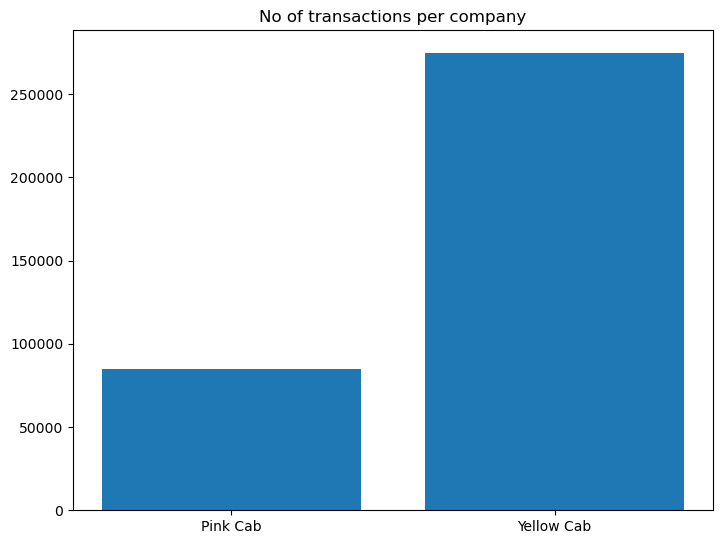

In [158]:
print(len(trans_yellow),'-- total transaction of yellow cab') # total transaction of yellow cab
print(len(trans_pink),'-- total transaction of pink cab') # total transaction of pink cab

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
companies = ['Pink Cab', 'Yellow Cab']
transactions = [len(trans_pink),len(trans_yellow)]
ax.bar(companies,transactions)
plt.title('No of transactions per company')
plt.show()


# Analysis based on each weekdays

1. From below Bar graph its visible that cabs are used mostly in weekends.
2. Yellow Cab has more transactions in any day of the week.


In [250]:
day_label = df3.Day.value_counts().index
pink_day = df3.where(df3.Company=='Pink Cab').Day.value_counts().values
yellow_day = df3.where(df3.Company=='Yellow Cab').Day.value_counts().values

# df_pink['Day'].value_counts().plot(kind='bar')


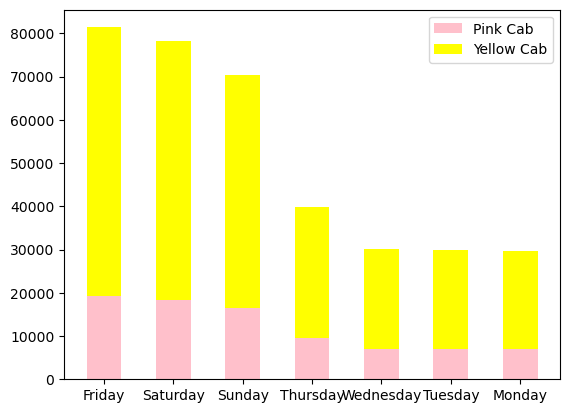

In [253]:
plt.bar(day_label,pink_day,.5,label='Pink Cab',color='pink')
plt.bar(day_label,yellow_day,.5,bottom=pink_day,label='Yellow Cab',color='yellow')
plt.legend()
plt.show()

# Classification based on gender

1. Males hire more no.of cabs than Female
2. Pink cab has almost equal number of male and female customer

In [254]:
gender_label = df3.Gender.value_counts().index
pink_gender = df3.where(df3.Company=='Pink Cab').Gender.value_counts().values
yellow_gender = df3.where(df3.Company=='Yellow Cab').Gender.value_counts().values

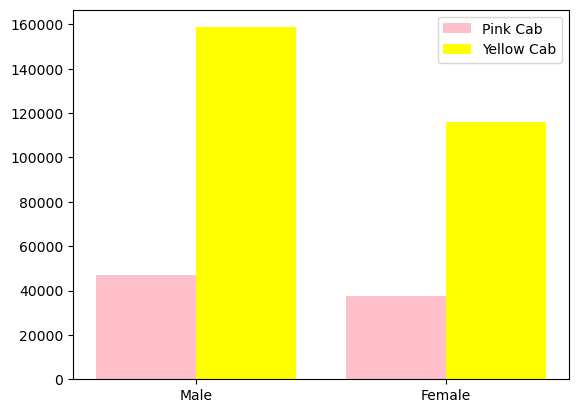

In [263]:
w=0.4
bar1 = [0,1]
bar2 = [.4,1+w]
plt.bar(bar1,pink_gender,w,label='Pink Cab',color='pink')
plt.bar(bar2,yellow_gender,w,label='Yellow Cab',color='yellow')
plt.xticks([0.2,1.2],gender_label)
plt.legend()
plt.show()

# kms travelled per days

1. No. of transactions on saturdays are more but the trips seems to be short on saturdays.
2. The kms travelled on thursdays are higher.

In [275]:
day_kms_pink = df3.where(df3.Company=='Pink Cab').groupby('Day').sum()['KM_Travelled']
day_kms_yellow = df3.where(df3.Company=='Yellow Cab').groupby('Day').sum()['KM_Travelled']


Day
Friday       1403818.67
Monday        512473.06
Saturday     1353509.12
Sunday       1215990.90
Thursday      677686.43
Tuesday       517853.12
Wednesday     518086.17
Name: KM_Travelled, dtype: float64

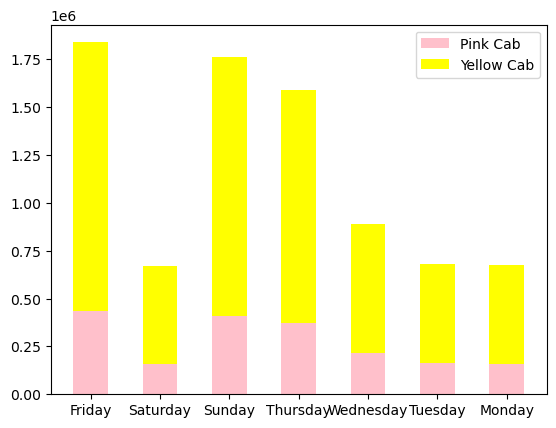

In [276]:
plt.bar(day_label,day_kms_pink,.5,label='Pink Cab',color='pink')
plt.bar(day_label,day_kms_yellow,.5,bottom=day_kms_pink,label='Yellow Cab',color='yellow')
plt.legend()
plt.show()

# Profit 

1. Yellow Cab makes more profit in each day of the week
2. Although weekends have more number transactions, there is a very less profit on saturdays. This is because on saturday the trips are very short.
3. Pink cab made very less profit when compared to yellow cab. 

In [264]:
df3['profit'] = df3['Price_Charged'] - df3['Cost_of_Trip']


In [265]:
df3.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date,Day,profit
0,10000011,"2016-01-08,Friday",Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016-01-08,Friday,57.315
1,10000012,"2016-01-06,Wednesday",Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016-01-06,Wednesday,23.666
2,10000013,"2016-01-02,Saturday",Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016-01-02,Saturday,27.568
3,10000014,"2016-01-07,Thursday",Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016-01-07,Thursday,25.798
4,10000015,"2016-01-03,Sunday",Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016-01-03,Sunday,16.844


In [272]:
day_profit_pink = df3.where(df3.Company=='Pink Cab').groupby('Day').sum()['profit']
day_profit_yellow = df3.where(df3.Company=='Yellow Cab').groupby('Day').sum()['profit']


Day
Friday       1.054981e+07
Monday       3.172373e+06
Saturday     1.004241e+07
Sunday       9.758349e+06
Thursday     4.141053e+06
Tuesday      3.179840e+06
Wednesday    3.176537e+06
Name: profit, dtype: float64

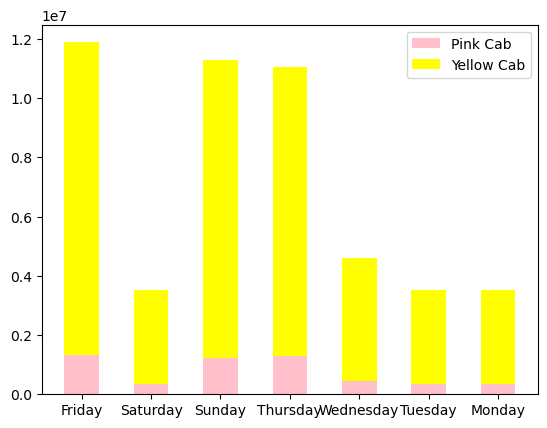

In [273]:
plt.bar(day_label,day_profit_pink,.5,label='Pink Cab',color='pink')
plt.bar(day_label,day_profit_yellow,.5,bottom=day_profit_pink,label='Yellow Cab',color='yellow')
plt.legend()
plt.show()


# Cab users in Christmas and New Year period (20th Dec to 5th Jan)

1. Doesnt affect the trend of cab distribution among cities.
2. yellow has 3 times more transactions than pink as in other time of the year.

In [288]:
Xmas = df3.loc[df3['Date'].between('2018-12-20','2018-12-31', inclusive=True)]
period2 = df3.loc[df3['Date'].between('2017-12-20','2018-01-05', inclusive=True)]
period3 = df3.loc[df3['Date'].between('2016-01-01','2016-01-05', inclusive=True)]
period4 = df3.loc[df3['Date'].between('2016-12-20','2017-01-05', inclusive=True)]


/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/1804306534.py:1: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/1804306534.py:2: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/1804306534.py:3: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.

/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/1804306534.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.



In [290]:
Xmas = Xmas.append(period2,ignore_index=True)


/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/3368628884.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [291]:
Xmas = Xmas.append(period3,ignore_index=True)

/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/4038247903.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [292]:
Xmas = Xmas.append(period4,ignore_index=True)

/var/folders/1c/d3n7ylmn71n9gw84l4xx1pp00000gn/T/ipykernel_14698/3897917753.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [295]:
Xmas_pink = Xmas.where(Xmas.Company=='Pink Cab').City.value_counts().values
Xmas_yellow = Xmas.where(Xmas.Company=='Yellow Cab').City.value_counts().values

In [296]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labelp, values=Xmas_pink[:10], name="Pink Cab"),
              1, 1)
fig.add_trace(go.Pie(labels=labely, values=Xmas_yellow[:10], name="Yellow Cab"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.2, hoverinfo="label+percent+name")

fig.update_layout(
    title_text=" Xmas Period",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pink', x=0.204, y=0.5, font_size=14, showarrow=False),
                 dict(text='Yellow', x=0.81, y=0.5, font_size=14, showarrow=False)])
fig.show()

In [297]:
trans_pink_Xmas = Xmas.where(Xmas.Company == 'Pink Cab').Transaction_ID.value_counts().values
trans_yellow_Xmas = Xmas.where(Xmas.Company == 'Yellow Cab').Transaction_ID.value_counts().values

6015 -- total transaction of pink cab
18411 -- total transaction of yellow cab


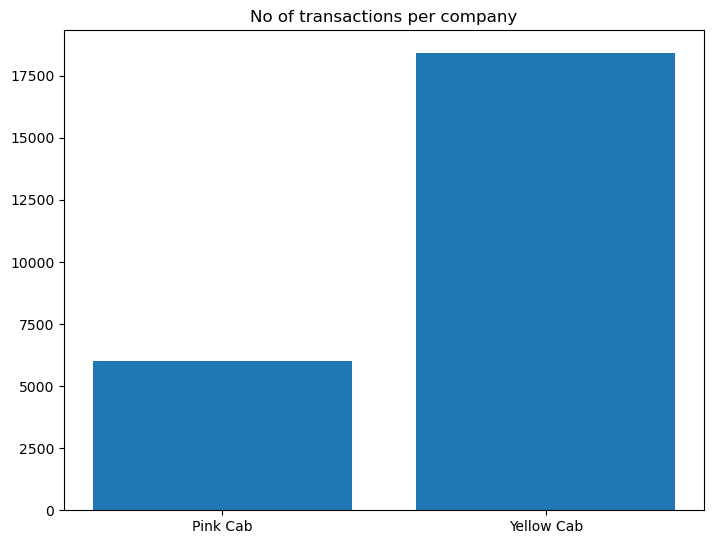

In [299]:
print(len(trans_pink_Xmas),'-- total transaction of pink cab') # total transaction of yellow cab
print(len(trans_yellow_Xmas),'-- total transaction of yellow cab') # total transaction of pink cab

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
companies = ['Pink Cab', 'Yellow Cab']
transactions = [len(trans_pink_Xmas),len(trans_yellow_Xmas)]
ax.bar(companies,transactions)
plt.title('No of transactions per company')
plt.show()

In [301]:
df3.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income_(USD/Month)', 'Date', 'Day', 'profit'],
      dtype='object')

# Age group

1. People in age group of 20s and 30s uses the cab mostly
2. The trend in number users is same in both the companies

In [322]:
df3['age_bins'] = pd.cut(x=df3['Age'], bins=[10,20,30,40,50,60,70,80,90,100,110,np.inf],labels=['10s', '20s', '30s', '40s','50s','60s','70s','80s','90s','100s','nan'])
df3

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date,Day,profit,age_bins
0,10000011,"2016-01-08,Friday",Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016-01-08,Friday,57.3150,20s
1,10000012,"2016-01-06,Wednesday",Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016-01-06,Wednesday,23.6660,20s
2,10000013,"2016-01-02,Saturday",Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,2016-01-02,Saturday,27.5680,50s
3,10000014,"2016-01-07,Thursday",Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,2016-01-07,Thursday,25.7980,20s
4,10000015,"2016-01-03,Sunday",Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,2016-01-03,Sunday,16.8440,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,"2018-01-08,Monday",Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,2018-01-08,Monday,5.8800,20s
359388,10440104,"2018-01-04,Thursday",Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,2018-01-04,Thursday,6.9020,30s
359389,10440105,"2018-01-05,Friday",Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,2018-01-05,Friday,87.4200,50s
359390,10440106,"2018-01-05,Friday",Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,2018-01-05,Friday,32.1420,30s


In [323]:
age_label = df3.age_bins.value_counts().index
pink_age = df3.where(df3.Company=='Pink Cab').age_bins.value_counts().values
yellow_age = df3.where(df3.Company=='Yellow Cab').age_bins.value_counts().values

In [325]:
age_label

CategoricalIndex(['20s', '30s', '40s', '50s', '10s', '60s', '70s', '80s',
                  '90s', '100s', 'nan'],
                 categories=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', ...], ordered=True, dtype='category')

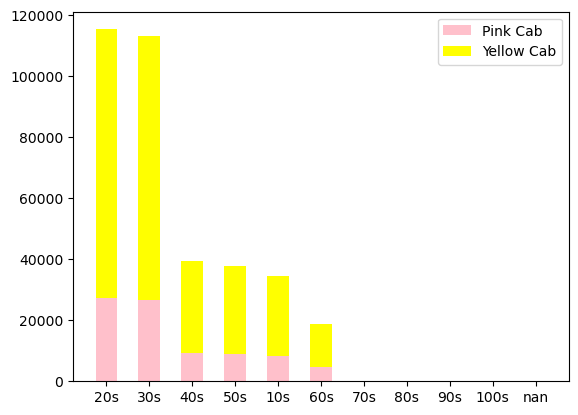

In [324]:
plt.bar(age_label,pink_age,.5,label='Pink Cab',color='pink')
plt.bar(age_label,yellow_age,.5,bottom=pink_age,label='Yellow Cab',color='yellow')
plt.legend()
plt.show()

# Hypothesis

1. No additional seasonal 